In [2]:
import matplotlib.pyplot as plt


# Clustering Colors from an Image

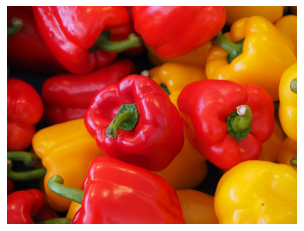

In [3]:
# load image
img = plt.imread('/content/peppers.jpg')
#img = plt.imread('rose2.jfif')
plt.imshow(img) #show image
plt.axis('off');


In [4]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3) 
print(img_flat.shape) 
img_flat[:5,:] 
img_flat.shape

(307200, 3)


(307200, 3)

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

In [15]:
# Question1 Apply k-means Algorithm
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=7).fit(img_flat)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

[[[ 47  22   8]
  [ 47  22   8]
  [ 47  22   8]
  ...
  [137  19   4]
  [137  19   4]
  [137  19   4]]

 [[ 47  22   8]
  [ 47  22   8]
  [ 47  22   8]
  ...
  [137  19   4]
  [137  19   4]
  [137  19   4]]

 [[ 47  22   8]
  [ 47  22   8]
  [ 47  22   8]
  ...
  [137  19   4]
  [137  19   4]
  [137  19   4]]

 ...

 [[203  18  15]
  [203  18  15]
  [203  18  15]
  ...
  [234 167   7]
  [234 167   7]
  [234 167   7]]

 [[203  18  15]
  [203  18  15]
  [203  18  15]
  ...
  [234 167   7]
  [234 167   7]
  [234 167   7]]

 [[203  18  15]
  [203  18  15]
  [203  18  15]
  ...
  [234 167   7]
  [234 167   7]
  [234 167   7]]]


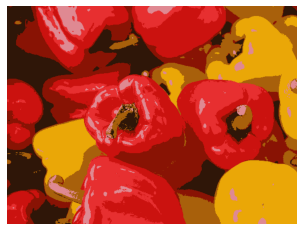

In [16]:
#Question 2
# loops for each cluster center
#replace kmeans.labels_ with kmeans.cluster_centers_[i]
import numpy as np
img_flat2 = img_flat.copy()
for i in np.unique( kmeans. labels_):
  img_flat2[kmeans. labels_==i, :] = kmeans.cluster_centers_[i]
img2 = img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis('off');
print(img2)

# From the previous image we see as we add more n_clusters the resolution of the image be better as when clustering more grades of the same color then feed the image with it so The more color grades we supply, the greater the resolution

#Question 3 Apply elbow method

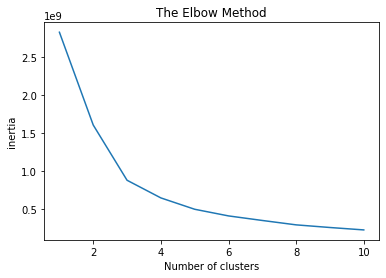

In [12]:
from sklearn.cluster import KMeans
all_inertia=[]
for i in range (1,11):
  kmeans = KMeans (n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  kmeans.fit(img_flat)
  all_inertia.append( kmeans. inertia_)
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster
plt.plot(range(1,11), all_inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()